<a href="https://colab.research.google.com/github/Rafael-limaa/Arquivos/blob/main/Mini_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou você para uma consultoria estratégica.
A empresa irá investir em imóveis no Condado de County, nos Estados Unidos.
Utilizando o dataset disponibilizado, você irá aplicar os conceitos de CRISP-DM aprendidos até o momento em um projeto prático, que busca desenvolver seu pensamento analítico, insights e tomada de decisões.

King County - Condado de King - Washington

O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle.
Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12o mais populoso do país. Wikipédia
O Dataset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total de 21 atributos.


O Projeto de Insight cobre 5 questionamentos basicamente (Que você estabelecer):

A Questão de Negócio:
- Qual a minha meta? 
ENCONTRAR OS 5 MELHORES IMOVEIS PARA COMPRA E OS 5 QUE NAO DEVEM SER COMPRADOS
- Como posso chegar?

O Entendimento do Negócio:
- Quais dados eu tenho disponível?
- Eles são relevantes para o problema?
- Eles me trazem uma solução direta?
- Qual o meu setor ou range de negócio?

A Coleta de Dados:

- Os dados que eu tenho fazem sentido?
- Estão no formato que eu gostaria?
- O que mais eu consigo obter de informação destes dados?

A Limpeza de Dados:
- Remoção de dados outliers e valores ausentes

A Exploração de Dados:
- Visualização dos dados
- Quais as minhas métricas essenciais
- Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.


Dicas de Insights
- Encontre a cidade de cada imóvel;
- Calcule o preço por área de imóvel;
- Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

In [1]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
!pip install pyzipcode
from pyzipcode import ZipCodeDatabase
import seaborn as sns
!pip install geopy
from geopy import Nominatim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyzipcode: filename=pyzipcode-3.0.1-py3-none-any.whl size=1932413 sha256=3bdb8c4d08f3441dac3d5002d5bcfcc1a2442ffdd9b5e5955a9122faed131155
  Stored in directory: /root/.cache/pip/wheels/f6/01/8e/7424c7e867eb5db7bb9531b09b4d968f23e5ac45ec5e7c3cb3
Successfully built pyzipcode
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importando o dataframe

house = pd.read_csv('/content/kc_house_data.csv')

In [3]:
#Visializando o dataframe
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Após a visualização foi necessário formatar algumas informações para facilitar na analise.

# FORMATANDO A COLUNA DATA PARA O FORMATO DE DATA
house['date'] = pd.to_datetime(house['date'], format = '%Y%m%dT%H%M%S')

# FORMATANDO A COLUNA DE BEDROOMS PARA NÚMEROS INTEIROS
house['bedrooms'] = house['bedrooms'].astype(int)

# FORMATANDO A COLUNA DE BATHROOMS PARA NÚMEROS INTEIROS
house['bathrooms'] = house['bathrooms'].astype(int)

# FORMATANDO A COLUNA DE FLOORS PARA NÚMEROS INTEIROS
house['floors'] = house['floors'].astype(int)



In [31]:
# Informações Tecnicas

house.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  int64         
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  int64         
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [32]:
# Quantidade de linhas de colunas

house.shape

(21613, 21)

In [6]:
# Visualizando as 5 primeiros itens da lista

house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Visualizando os 5 ultimos itens da lista
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0,1020,1076,2,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [67]:
# Calculando informações Estatísticas
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Verificando o nome de todas as colunas
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Renomenando as colunas necessárias
house_renamed = house.rename(columns = {'id' : 'id',
                                        'date' : 'data_da_venda',
                                        'price' : 'preco_da_venda',
                                        'bedrooms' : 'quartos',
                                        'bathrooms' : 'banheiros',
                                        'sqft_living' : 'tamanho_do_imovel',
                                        'sqft_lot' : 'tamanho_do_terreno',
                                        'floors' : 'andares',
                                        'waterfront' : 'beira_mar',
                                        'view' : 'vista_do_imovel',
                                        'condition' : 'condicao_da_casa',
                                        'grade' : 'classificacao_do_material_utilizado',
                                        'sqft_above' : 'acima_do_solo',
                                        'sqft_basement' : 'abaixo_do_solo',
                                        'yr_built' : 'ano_da_construcao',
                                        'yr_renovated' : 'ano_da_renovacao',
                                        'zipcode' : 'cep',
                                        'lat' : 'latitude',
                                        'long' : 'longitude',
                                        'sqft_living15' : 'área_habitavel_proximo',
                                        'sqft_lot15' : 'tamanha_habitavel_proximo'                                   
                                        })

In [10]:
# verificando como ficou os nomes após
house_renamed.columns

Index(['id', 'data_da_venda', 'preco_da_venda', 'quartos', 'banheiros',
       'tamanho_do_imovel', 'tamanho_do_terreno', 'andares', 'beira_mar',
       'vista_do_imovel', 'condicao_da_casa',
       'classificacao_do_material_utilizado', 'acima_do_solo',
       'abaixo_do_solo', 'ano_da_construcao', 'ano_da_renovacao', 'cep',
       'latitude', 'longitude', 'área_habitavel_proximo',
       'tamanha_habitavel_proximo'],
      dtype='object')

In [11]:
# Identificando se existem valores NULOS no DF

house_renamed.isnull()

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,classificacao_do_material_utilizado,acima_do_solo,abaixo_do_solo,ano_da_construcao,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Soamando os valores NULOS se houver
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
# Criando uma coluna com o nome da cidade usando cep
# Criando uma variável chamada zcbd para ser usada para armazenar e consultar dados relacionados a códigos.

zcbd = ZipCodeDatabase()
cities = []

for zipcode in house_renamed['cep']:
   try:
    zc = zcbd[zipcode]
    cities.append(zc.city)
   except KeyError:
    cities.append(float('nan'))
house_renamed['cidade'] = cities


In [14]:
# Verificando quantas cidade exitem no df após lozalizar as cidade pelo CEP

house_renamed['cidade'].nunique()


24

In [44]:
# A partir do nome das cidades, podemos saber a quantidade de imoveis por cidade

qtd_imoveis_por_cidade = house_renamed['cidade'].value_counts()
print(qtd_imoveis_por_cidade)

Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Snoqualmie        310
Kenmore           283
Mercer Island     282
Woodinville       273
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: cidade, dtype: int64


In [48]:
# e calcular a proporção de casas por cidade 
proporcao_casas = house_renamed['cidade'].value_counts(normalize=True) * 100

# Exibe a proporção
print(proporcao_casas)


Seattle          41.919216
Renton            7.457390
Bellevue          6.570161
Kent              5.617558
Redmond           4.571562
Kirkland          4.562223
Auburn            4.258697
Sammamish         3.735699
Federal Way       3.637637
Issaquah          3.422834
Maple Valley      2.755078
Snoqualmie        1.447583
Kenmore           1.321504
Mercer Island     1.316834
Woodinville       1.274807
Enumclaw          1.092692
North Bend        1.031987
Bothell           0.910577
Duvall            0.887229
Carnation         0.579033
Vashon            0.551016
Black Diamond     0.466962
Fall City         0.378240
Medina            0.233481
Name: cidade, dtype: float64


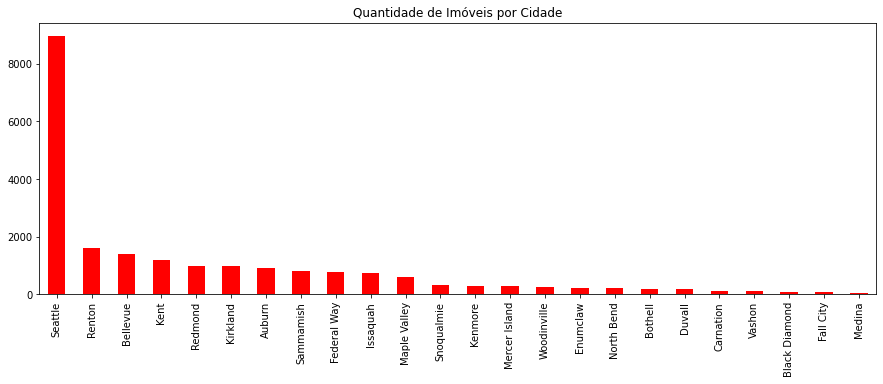

In [49]:
# Sabendo agora que temos 24 cidades, é possível visualizar em forma de um gráfico a quantidade de imoveis por cidade

cidade_counts = house_renamed['cidade'].value_counts()

plt.figure(figsize=(15, 5))
cidade_counts.plot(kind='bar', color='red')

plt.title('Quantidade de Imóveis por Cidade');


In [15]:
# Criando a relação entre Preço X Tamanho do imóvel FT2

pi_ft2 = []

for p, m in zip(house_renamed['preco_da_venda'], house_renamed['tamanho_do_imovel']):
  try:
    pm = float(p) / float(m)
    pi_ft2.append(pm)   
  except KeyError:
    pi_ft2.append(float('nan'))
house_renamed['preco_imovel_ft2'] = pi_ft2

In [16]:
# Criando a relação entre Preço X Tamanho do Terreno FT2
pt_ft2 = []

for p, m in zip(house_renamed['preco_da_venda'], house_renamed['tamanho_do_terreno']):
  try:
    pm = float(p) / float(m)
    pt_ft2.append(pm)   
  except KeyError:
    pt_ft2.append(float('nan'))
house_renamed['preco_terreno_ft2'] = pt_ft2


In [50]:
# Realizar uma validação para encontrar a qtd de imoveis que já foram vendidos através do ID

qtd_imóveis_unicos = house_renamed['id'].nunique()

qtd_imóveis_total = house_renamed['id'].count()

equacao = qtd_imóveis_total - qtd_imóveis_unicos

print(equacao)

177


In [18]:
# Sabendo que temos imoveis que já foram vendidos, 
# foi necessário criar uma correlação entre a venda atual e a última para saber se houver valorização do imovel

# Agrupar o DataFrame pelo id e ordena pelas datas de venda em ordem crescente

grouped = house_renamed.sort_values('data_da_venda').groupby('id')

# Calcular a diferença de preço entre vendas consecutivas para cada grupo

diff_prices = grouped['preco_da_venda'].diff()

# Criar uma nova coluna no DataFrame original com as diferenças de preço

house_renamed['diferenca_de_preco'] = diff_prices

# Preencher valores faltantes 'nan' com 0

house_renamed.diferenca_de_preco = house_renamed.diferenca_de_preco.fillna(0, inplace = False)


In [65]:
# Depois de todas as informações extras, vamos visualizar o novo df

house_renamed.head()

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,cidade,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847,39.274336,0.0
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521,74.288870,0.0
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234,18.000000,0.0
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265,120.800000,0.0
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429,63.118812,0.0


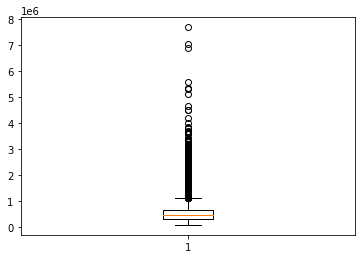

In [58]:
# Após criar as correlações necessárias, plotei alguns gráficos de dispersão para visualizar os outliers do preco de venda e outras variáveis

plt.boxplot(house_renamed['preco_da_venda']);


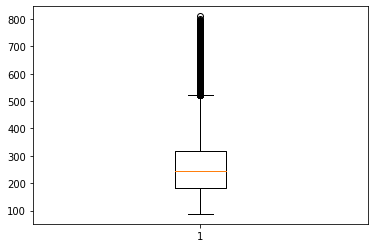

In [59]:
plt.boxplot(house_renamed['preco_imovel_ft2']);

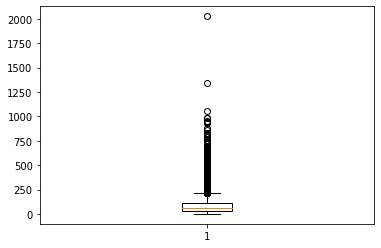

In [61]:
plt.boxplot(house_renamed['preco_terreno_ft2']);

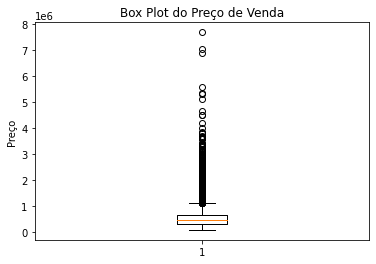

In [55]:
# Cria um box plot dos preços de venda
plt.boxplot(house_renamed['preco_da_venda'])

# Configura o título e os rótulos dos eixos
plt.title('Box Plot do Preço de Venda')
plt.ylabel('Preço')

# Exibe o gráfico
plt.show()

In [20]:
# Verificando as informações estatísticas com as novas colunas

house_renamed.describe()

,id,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,condicao_da_casa,...,ano_da_construcao,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,264.156594,88.966710,1111.497756
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,110.060793,94.055247,15235.119666
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,87.588235,0.163119,-40000.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,182.291667,33.333333,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,244.644550,59.223301,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,318.322981,107.594937,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,810.138889,2027.208539,529950.000000


In [83]:
# Nessa parte decidi eliminar alguns outliers pelo preço por ft2
# ordenar os valores pela coluna de interesse

clean_house = house_renamed.sort_values('preco_imovel_ft2')

# remover as cinco primeiras e cinco últimas linhas pelo valor da venda

kc_house = clean_house.iloc[5:-5]


In [84]:
# Aqui podemos visualizar os imoveis que foram removidos do df
kc_house.head()

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,cidade,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco
6523,8661000089,2014-07-16,199950.0,3,2,2270,13590,1,0,0,...,0,98022,47.2099,-122.001,1160,13545,Enumclaw,88.083700,14.713024,0.0
14993,4222310010,2014-12-26,152500.0,4,1,1730,7350,1,0,0,...,0,98003,47.3467,-122.307,1440,7752,Federal Way,88.150289,20.748299,0.0
12185,7686202065,2014-07-23,170000.0,4,1,1920,7500,1,0,0,...,0,98198,47.4222,-122.318,1490,8000,Seattle,88.541667,22.666667,0.0
8200,5379804470,2014-06-17,170000.0,4,1,1920,13787,1,0,0,...,0,98188,47.4502,-122.277,1490,11200,Seattle,88.541667,12.330456,0.0
18590,2154900040,2014-10-30,194250.0,3,2,2190,8834,1,0,0,...,0,98001,47.2633,-122.244,1490,8766,Auburn,88.698630,21.988906,0.0


In [85]:
# Aqui podemos visualizar os imoveis que foram removidos do df
kc_house.tail()

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,cidade,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco
18876,9808700025,2015-02-11,1500000.0,3,1,1910,21374,1,0,0,...,0,98004,47.6453,-122.214,2850,16167,Bellevue,785.340314,70.178722,0.0
12757,2767603026,2015-04-15,425000.0,2,1,540,2500,1,0,0,...,0,98107,47.6729,-122.383,1290,5000,Seattle,787.037037,170.000000,0.0
6243,5536100010,2015-02-04,1050000.0,4,1,1330,9729,1,0,0,...,0,98004,47.6223,-122.208,2920,10353,Bellevue,789.473684,107.924761,0.0
7313,4131900066,2014-08-25,3100000.0,3,3,3920,13085,2,1,4,...,0,98040,47.5716,-122.204,3450,13287,Mercer Island,790.816327,236.912495,0.0
18597,3222049087,2015-04-22,570000.0,1,1,720,7540,1,1,4,...,0,98198,47.3509,-122.323,1120,9736,Seattle,791.666667,75.596817,0.0


In [89]:
# agrupamento dos dados por cidade, e cálculo da média do preço por metro quadrado, quantidade banheiros, vista etc...

df_agrupado = kc_house.groupby(['cidade']).agg({'preco_da_venda': 'mean', 
                                                     'preco_imovel_ft2': 'mean', 
                                                     'banheiros' : 'mean', 
                                                     'quartos' : 'mean', 
                                                     'andares' : 'mean', 
                                                     'vista_do_imovel' : 'mean', 
                                                     'tamanho_do_imovel': 'mean',
                                                     'tamanho_do_terreno' : 'mean',
                                                     'beira_mar' : 'mean'})
# ordenação do DataFrame por preço por metro quadrado

df_ordenado = df_agrupado.sort_values(by='preco_imovel_ft2')

In [92]:
# No DF abaixo é possíveil visualizar a média de preço por ft2; venda; banheiros, quartos etc.. dos imoveis por cada cidade
# Ordenado pelo preço FT2

df_ordenado

,preco_da_venda,preco_imovel_ft2,banheiros,quartos,andares,vista_do_imovel,tamanho_do_imovel,tamanho_do_terreno,beira_mar
cidade,,,,,,,,,
Federal Way,2.893849e+05,151.864892,1.670090,3.400513,1.304236,0.155327,1967.858793,10517.973042,0.005135
Auburn,2.916380e+05,153.116671,1.679473,3.416026,1.447859,0.095499,1955.003293,20091.091109,0.000000
Kent,2.995499e+05,160.586410,1.701579,3.438903,1.438903,0.029925,1941.147132,14973.598504,0.000000
Maple Valley,3.673037e+05,173.801661,1.952462,3.436333,1.730051,0.027165,2149.239389,25338.528014,0.000000
Enumclaw,3.157093e+05,181.806440,1.589744,3.149573,1.247863,0.628205,1832.324786,74102.047009,0.000000
Renton,4.036309e+05,196.709841,1.739185,3.507210,1.447022,0.080878,2099.658307,13910.474608,0.001881
Duvall,4.247887e+05,203.001725,1.863158,3.363158,1.694737,0.021053,2171.557895,39838.384211,0.000000
Black Diamond,4.236660e+05,210.095356,1.620000,3.290000,1.400000,0.100000,2137.590000,55465.300000,0.000000
Snoqualmie,5.279612e+05,210.886047,2.093548,3.522581,1.858065,0.290323,2571.322581,17065.183871,0.000000


In [113]:
# Aqui, vamos checar os imoveis e verifcar quais são as melhores oportunidade de compras baseados nos parâmetros 

df_filter = (
    (kc_house['diferenca_de_preco'] >= 0) &
    (kc_house['preco_imovel_ft2'] < kc_house['preco_imovel_ft2'].mean()) &
    (kc_house['preco_terreno_ft2'] < kc_house['preco_terreno_ft2'].mean()) &
    (kc_house['banheiros'] > kc_house['banheiros'].mean() + 1) &
    (kc_house['quartos'] > kc_house['quartos'].mean() + 1) &
    (kc_house['andares'] >= 1) &
    (kc_house['vista_do_imovel'] >= 1) &
    (kc_house['ano_da_construcao'] >= 2000))

selects_houses = kc_house[df_filter]


In [114]:
# DF com as casas que passaram no teste dos parâmetros

selects_houses 

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,cidade,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco
1967,9476200350,2014-10-13,471750.0,5,3,3790,8200,1,0,1,...,0,98056,47.4891,-122.190,1740,8676,Renton,124.472296,57.530488,0.0
21050,2424059170,2015-02-19,900000.0,5,6,7120,40806,2,0,4,...,0,98006,47.5451,-122.114,3440,36859,Bellevue,126.404494,22.055580,0.0
5615,4307330050,2014-07-21,439900.0,5,3,3390,7950,2,0,2,...,0,98056,47.4792,-122.181,2580,6900,Renton,129.764012,55.333333,0.0
5132,2111011060,2014-06-18,507000.0,5,3,3850,16249,2,0,2,...,0,98092,47.3324,-122.168,2640,7393,Auburn,131.688312,31.201920,0.0
1931,5379804150,2015-02-11,598800.0,6,4,4470,17877,3,0,3,...,0,98188,47.4514,-122.273,1790,18260,Seattle,133.959732,33.495553,0.0
14984,4136960010,2015-03-27,480000.0,5,3,3480,12821,2,0,2,...,0,98092,47.2641,-122.215,3400,9870,Auburn,137.931034,37.438577,0.0
8889,8556800090,2015-04-30,525000.0,5,3,3450,19080,2,0,3,...,0,98022,47.2123,-122.005,2570,17007,Enumclaw,152.173913,27.515723,0.0
5155,3333002385,2015-04-17,370000.0,5,3,2220,5185,2,0,3,...,0,98118,47.5430,-122.290,2340,6316,Seattle,166.666667,71.359691,0.0
13697,3343301490,2014-09-09,818500.0,5,3,4790,12957,2,0,1,...,0,98006,47.5469,-122.194,2620,13538,Bellevue,170.876827,63.170487,0.0
13907,7851990120,2014-07-01,925000.0,5,5,5190,12637,2,0,2,...,0,98065,47.5424,-121.872,3840,12637,Snoqualmie,178.227360,73.197753,0.0


In [128]:
# Como ainda temos mais de 5 casa, foi necessário criar uma lista de 5 melhores investimentos pelo preço de venda

selects_houses = kc_house[df_filter].nsmallest(5, 'preco_da_venda')


In [126]:
selects_houses 

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,cidade,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco,endereco
1967,9476200350,2014-10-13,471750.0,5,3,3790,8200,1,0,1,...,98056,47.4891,-122.190,1740,8676,Renton,124.472296,57.530488,0.0,"411, Windsor Way Northeast, Highlands Park, Re..."
21050,2424059170,2015-02-19,900000.0,5,6,7120,40806,2,0,4,...,98006,47.5451,-122.114,3440,36859,Bellevue,126.404494,22.055580,0.0,"169th Place Southeast, Bellevue, King County, ..."
5615,4307330050,2014-07-21,439900.0,5,3,3390,7950,2,0,2,...,98056,47.4792,-122.181,2580,6900,Renton,129.764012,55.333333,0.0,"2755, Southeast 4th Street, Liberty Ridge, Ren..."
5132,2111011060,2014-06-18,507000.0,5,3,3850,16249,2,0,2,...,98092,47.3324,-122.168,2640,7393,Auburn,131.688312,31.201920,0.0,"12962, Southeast 301st Street, Lea Hill, Aubur..."
1931,5379804150,2015-02-11,598800.0,6,4,4470,17877,3,0,3,...,98188,47.4514,-122.273,1790,18260,SeaTac,133.959732,33.495553,0.0,"4810, South 170th Street, McMicken Heights, Se..."


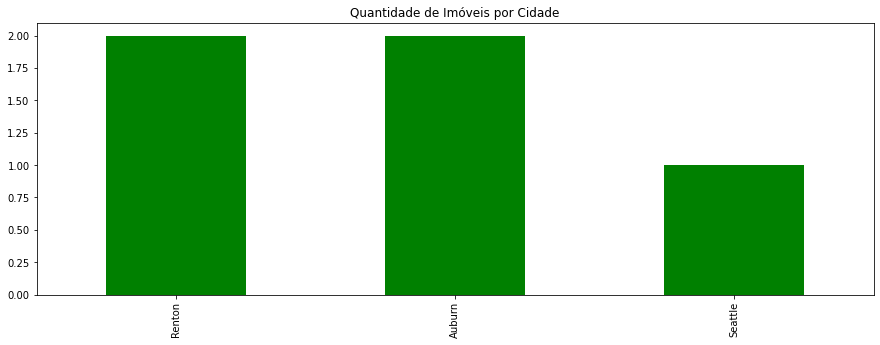

In [129]:
# Podemos visualizar nesse gráfico que as melhores oportunidades segundo a analise.

cidade_counts = selects_houses['cidade'].value_counts()

plt.figure(figsize=(15, 5))
cidade_counts.plot(kind='bar', color='Green')

plt.title('Quantidade de Imóveis por Cidade')
plt.show()

In [130]:
# Encontrando o endereço exato do imovel a partir da log e latiduade.

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='teste/1')
cidades = []

for lat, long in zip(selects_houses ['latitude'], selects_houses ['longitude']):
    location = geolocator.reverse(f'{lat}, {long}')
    cidade = location.raw['address'].get('town', location.raw['address'].get('city', ''))
    cidades.append(cidade)

selects_houses ['cidade'] = cidades


In [131]:
# df com o endereço

selects_houses 

,id,data_da_venda,preco_da_venda,quartos,banheiros,tamanho_do_imovel,tamanho_do_terreno,andares,beira_mar,vista_do_imovel,...,ano_da_renovacao,cep,latitude,longitude,área_habitavel_proximo,tamanha_habitavel_proximo,cidade,preco_imovel_ft2,preco_terreno_ft2,diferenca_de_preco
5155,3333002385,2015-04-17,370000.0,5,3,2220,5185,2,0,3,...,0,98118,47.5430,-122.290,2340,6316,Seattle,166.666667,71.359691,0.0
5615,4307330050,2014-07-21,439900.0,5,3,3390,7950,2,0,2,...,0,98056,47.4792,-122.181,2580,6900,Renton,129.764012,55.333333,0.0
1967,9476200350,2014-10-13,471750.0,5,3,3790,8200,1,0,1,...,0,98056,47.4891,-122.190,1740,8676,Renton,124.472296,57.530488,0.0
14984,4136960010,2015-03-27,480000.0,5,3,3480,12821,2,0,2,...,0,98092,47.2641,-122.215,3400,9870,Auburn,137.931034,37.438577,0.0
5132,2111011060,2014-06-18,507000.0,5,3,3850,16249,2,0,2,...,0,98092,47.3324,-122.168,2640,7393,Auburn,131.688312,31.201920,0.0


In [134]:
import folium

# Coordenadas do centro do mapa
lat, lon = selects_houses['latitude'].mean(), selects_houses ['longitude'].mean()

# Criação do mapa
mapa = folium.Map(location=[lat, lon], zoom_start=10)

# Adição de marcadores para cada casa
for _, row in selects_houses.iterrows():
    lat, lon = row['latitude'], row['longitude']
    preco = row['preco_da_venda']
    #endereco = row['endereco']
    cidade = row['cidade']
    
    popup = f'{cidade}<br>Preço de venda: ${preco:,.2f}'
    
    folium.Marker([lat, lon], popup=popup).add_to(mapa)

# Exibição do mapa
mapa
